In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

tech_supp_df = pd.read_csv("technical_support_data-1.csv")
tech_supp_df.dtypes


,0
PROBLEM_TYPE,object
no_of_cases,int64
Avg_pending_calls,float64
Avg_resol_time,int64
recurrence_freq,float64
Replace_percent,float64
In_warranty_percent,int64
Post_warranty_percent,int64


In [ ]:
tech_supp_df.head()

,PROBLEM_TYPE,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
0,Temperature control not working,170,1.3,32,0.04,0.0,75,25
1,power chord does not tightly fit,12,2.0,150,0.01,0.5,5,95
2,Fan swing not working,5,1.0,35,0.02,0.2,90,10
3,Main switch does not on,3,2.0,8,0.01,0.7,5,95
4,Forgot mobile app password,45,2.3,54,0.15,0.0,99,1


In [5]:
from scipy.stats import zscore
numeric_cols = tech_supp_df.drop('PROBLEM_TYPE', axis=1)
Prob_type = tech_supp_df.pop("PROBLEM_TYPE")
numeric_cols = numeric_cols.apply(zscore)
tech_supp_df = numeric_cols.join(Prob_type)
tech_supp_df.head()


,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password


Text(0.5, 1.0, 'Selecting k with the Elbow Method')

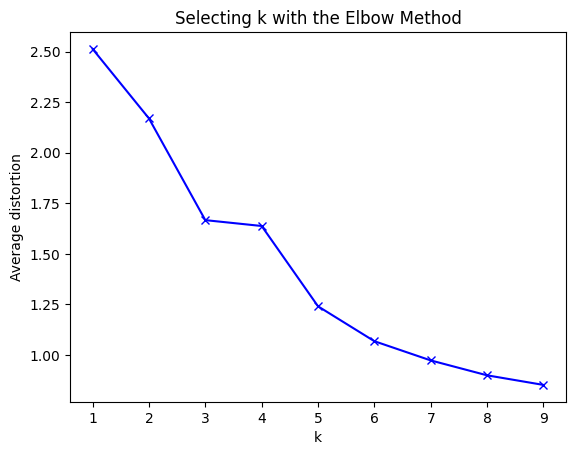

In [6]:
tech_supp_attributes = tech_supp_df.drop("PROBLEM_TYPE",axis=1)

#Finding optimal no. of clusters
from scipy.spatial.distance import cdist
clusters=range(1,10)
meanDistortions=[]

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(tech_supp_attributes)
    prediction=model.predict(tech_supp_attributes)
    meanDistortions.append(sum(np.min(cdist(tech_supp_attributes, model.cluster_centers_, 'euclidean'), axis=1)) / tech_supp_attributes.shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')


In [7]:
# Let us first start with K = 2
final_model=KMeans(2)
final_model.fit(tech_supp_attributes)
prediction=final_model.predict(tech_supp_attributes)

#Append the prediction
tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,1
1,power chord does not tightly fit,0
2,Fan swing not working,1
3,Main switch does not on,0
4,Forgot mobile app password,1
5,AC stops abruptly,1
6,App hangs while entring commands,1
7,App takes a long time to initialize,1
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,1


In [8]:
tech_supp_df.head()

,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent,PROBLEM_TYPE,GROUP
0,0.179429,-0.701207,-0.538351,-0.843188,-0.561463,0.138067,-0.138067,Temperature control not working,1
1,-0.862176,0.027143,1.510857,-1.101765,2.245854,-1.778204,1.778204,power chord does not tightly fit,0
2,-0.908323,-1.013357,-0.486253,-1.015573,0.561463,0.548696,-0.548696,Fan swing not working,1
3,-0.921508,0.027143,-0.955140,-1.101765,3.368781,-1.778204,1.778204,Main switch does not on,0
4,-0.644625,0.339294,-0.156296,0.104930,-0.561463,0.795074,-0.795074,Forgot mobile app password,1


<ipython-input-11-c2f210e45b97>:3: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([tech_supp_df["no_of_cases"][tech_supp_df.GROUP==0],


{'whiskers': [<matplotlib.lines.Line2D at 0x7bb8da9af9d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb8da9c0e90>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb8dbe3a190>,
 'medians': [<matplotlib.lines.Line2D at 0x7bb8da9c2450>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bb8da9c2dd0>,
 'means': []}

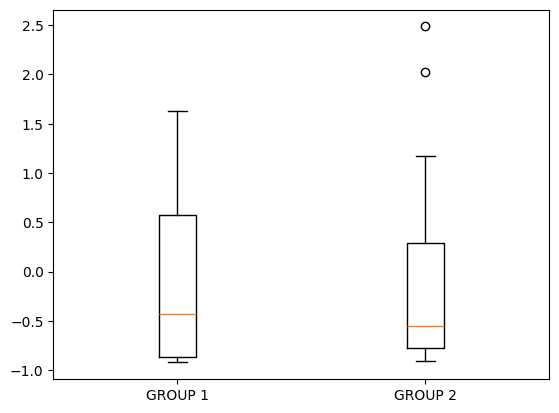

In [11]:
#plt.cla()

plt.boxplot([tech_supp_df["no_of_cases"][tech_supp_df.GROUP==0],
             tech_supp_df["no_of_cases"][tech_supp_df.GROUP==1]],
              labels=('GROUP 1','GROUP 2'))

array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

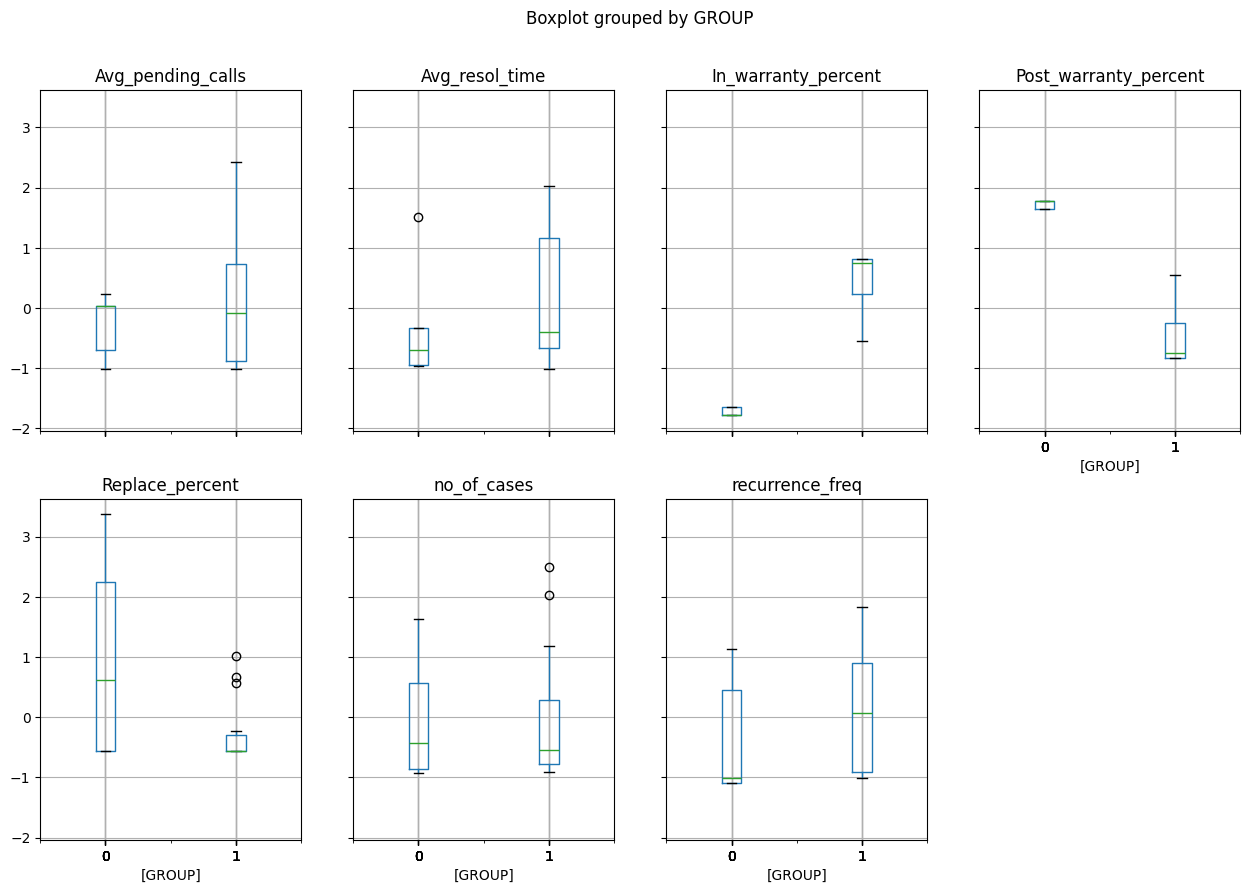

In [14]:
tech_supp_df.boxplot(by='GROUP', layout=(2, 4), figsize=(15, 10))


In [17]:
final_model = KMeans(3)
final_model.fit(tech_supp_attributes)
prediction = final_model.predict(tech_supp_attributes)

tech_supp_df["GROUP"] = prediction
print("Groups Assigned : \n")
tech_supp_df[["PROBLEM_TYPE", "GROUP"]]

Groups Assigned : 



,PROBLEM_TYPE,GROUP
0,Temperature control not working,1
1,power chord does not tightly fit,0
2,Fan swing not working,1
3,Main switch does not on,0
4,Forgot mobile app password,1
5,AC stops abruptly,2
6,App hangs while entring commands,2
7,App takes a long time to initialize,1
8,Unable to connect the App to the device,1
9,Reinstalling the app hangs the phone,2


<ipython-input-19-f3a540b27b06>:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([


{'whiskers': [<matplotlib.lines.Line2D at 0x7bb8d9f95c10>,
 'caps': [<matplotlib.lines.Line2D at 0x7bb8d9f97190>,
 'boxes': [<matplotlib.lines.Line2D at 0x7bb8d9f952d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7bb8d9fa0610>,
 'fliers': [<matplotlib.lines.Line2D at 0x7bb8d9fa0dd0>,
 'means': []}

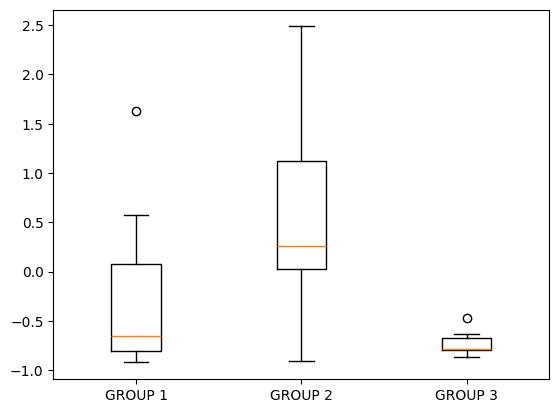

In [19]:
plt.boxplot([
    tech_supp_df["no_of_cases"][tech_supp_df.GROUP == 0],
    tech_supp_df["no_of_cases"][tech_supp_df.GROUP == 1],
    tech_supp_df["no_of_cases"][tech_supp_df.GROUP == 2]
], labels=('GROUP 1', 'GROUP 2', 'GROUP 3'))


array([[<Axes: title={'center': 'Avg_pending_calls'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Avg_resol_time'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'In_warranty_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'Post_warranty_percent'}, xlabel='[GROUP]'>],
       [<Axes: title={'center': 'Replace_percent'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'no_of_cases'}, xlabel='[GROUP]'>,
        <Axes: title={'center': 'recurrence_freq'}, xlabel='[GROUP]'>,
        <Axes: >]], dtype=object)

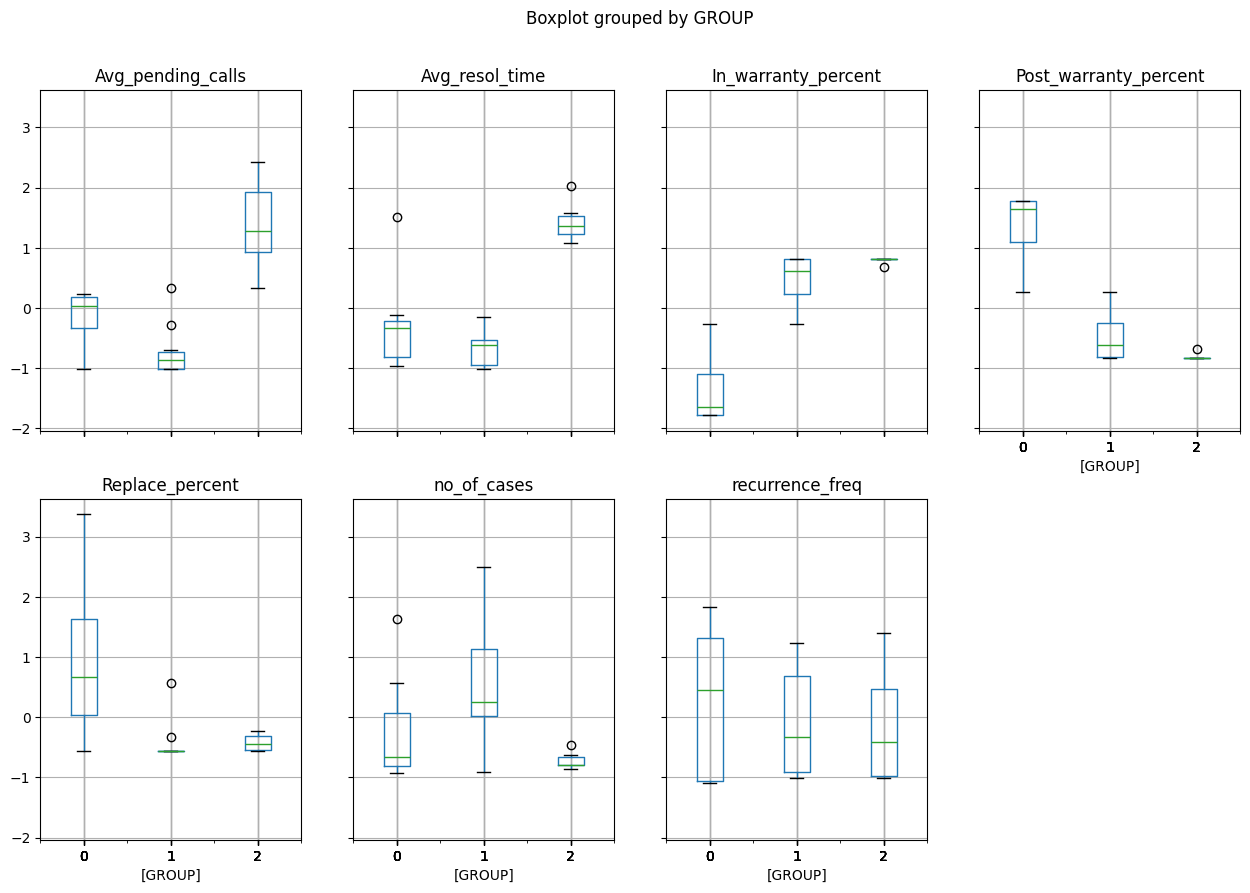

In [20]:
tech_supp_df.boxplot(by='GROUP', layout=(2, 4), figsize=(15, 10))


In [21]:
import pandas as pd

centroids_df = pd.DataFrame(final_model.cluster_centers_, columns=tech_supp_attributes.columns)
centroids_df.index = ['Cluster 0', 'Cluster 1', 'Cluster 2']
print("Centroids of Clusters:")
display(centroids_df)


Centroids of Clusters:


,no_of_cases,Avg_pending_calls,Avg_resol_time,recurrence_freq,Replace_percent,In_warranty_percent,Post_warranty_percent
Cluster 0,-0.201991,-0.151228,-0.262973,0.240375,0.970530,-1.348020,1.348020
Cluster 1,0.574316,-0.722017,-0.677281,-0.084694,-0.426712,0.463833,-0.463833
Cluster 2,-0.721537,1.379794,1.435604,-0.139282,-0.421098,0.799636,-0.799636


In [22]:
final_model.cluster_centers_


array([[-0.20199056, -0.151228  , -0.26297348,  0.24037539,  0.97052971,
        -1.34802042,  1.34802042],
       [ 0.5743157 , -0.72201674, -0.67728075, -0.08469351, -0.42671224,
         0.46383261, -0.46383261],
       [-0.72153719,  1.3797939 ,  1.43560365, -0.1392821 , -0.4210976 ,
         0.79963615, -0.79963615]])